# Ordinary differential equations (ODEs) 1

* **Form of ODE:** $$\frac{dy}{dt} = f(y,t)$$
    * (First order ODE)
* **Order of an ODE** is the highest derivative present.
    * Examples of first, second, third order ODEs?
    * Order of the ODE is different than the $\mathcal{O}$ order of a truncation error.
* **Boundary conditions (BCs):**
    * Need the same number of boundary conditions as the order of the ODE.
    * For $y=y(t)$, we call the BC an initial condition (I.C.).
        * Most first order ODEs use initial conditions. 
        * Doesn't have to be *time*
    * The solution $y(t)$ satisfies both the ODE and the BCs.
* **Linear ODE:** $y$ and all derivatives of $y$ are to the $1^{st}$ power, no products of y with itself or derivatives.
    * $y^{\prime} + \alpha y = f(t)$
        * linear for $\alpha(t)$, but not for $\alpha(y,t)$.
    * $yy^{\prime} + \alpha y = 0$
        * nonlinear
    * $y^{\prime} + \alpha t y = f(t)$
        * linear
* **System of ODEs:** Multiple dependent variables, one independent variable.
    * $dw/dt = f(w,z,t)$, 
    * $dz/dt = g(w,z,t)$.
    * We would normally write these in vector notation:
    $$\frac{d\vec{y}}{dt} = \vec{f}(\vec{y},t),$$
    * Or, just 
    $$\frac{dy}{dt} = f(y,t),$$
    where it's understood that we are dealing with vector quantities.
    * Here, $f$ is a function that takes a vector of variables and returns a vector of rates of those variables.
* **2 classes**
    1. <font color="blue">Initial value problems: </font>marching methods, usually time, usually first order ODE.
    2. <font color="green">Boundary value problems:</font>marching or equilibrium methods, usually higher order ODE (2 end points, solutions on spatial domains).
* **Physical classes**
    1. Propagation: IVP, order $\ge 1$.
    2. Equilibrium: BVP, order $\ge 2$.
    3. Eigenproblems: solutions only for special parameters.

## Methods

* Finite difference methods are emphasized here
    * Others include the class of Galerkin methods (finite element...)
* Transform a continuous calculus problem into an algebraic problem.


1. Discretize the independent variable into a grid
2. Approximate derivatives with F.D. approximations (Taylor series).
3. Solve

IVP: focus on single point methods (advance using only the previous point), as opposed to multi-step methods.

## Explicit Euler method

$$\frac{dy}{dt} = f(y,t),$$
$$y(t=0) = y_0.$$

* Use a first order forward difference approximation to the derivative
$$\frac{y_{k+1} - y_k}{\Delta t} = f(y_k,t),$$

<font color="blue">
$$y_{k+1} = y_k + \Delta t f(y_k,t).$$
</font>

* First order forward difference.
* *Explicit* since we can solve for the new point explicitly in terms of the old point.
* Taylor Series:
$$ y_{k+1} = y_k + y_k^{\prime}\Delta t + \frac{1}{2}y_k^{\prime\prime}\Delta t^2 + \ldots$$
* The error per step is $\mathcal{O}(\Delta t^2).$
* The cumulative error is $\mathcal{O}(\Delta t).$
    * If we take $n=t_{end}/\Delta t$ steps, the total error is $k\mathcal{O}(\Delta t^2)=\frac{t_{end}}{\Delta t}\mathcal{O}(\Delta t^2) = \mathcal{O}(\Delta t).$
* Generally, the global error is the order of the F.D. approximation to the derivative.
* So we say that the explicit Euler (EE) method is globally first order accurate. 
    * This means that the error is proportional to our step size.
* EE method is very easy to implement in Excel.

### Example 1 (EE)
$$\frac{dy}{dt} = -ay,$$
$$y_0 = 1,$$
$$a=1.1.$$
This equation has the exact solution $$y(t) = y_0e^{-at}.$$

In [1]:
import Plots as plt

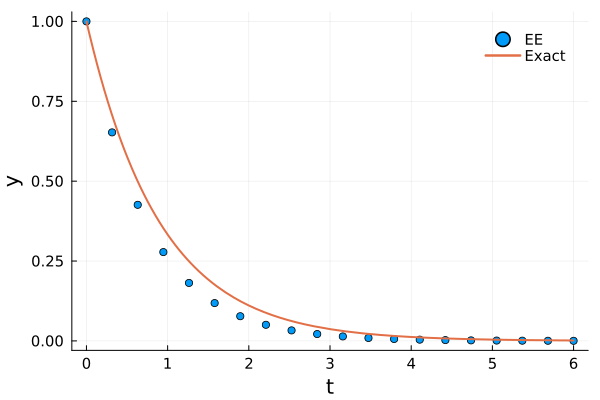

In [10]:
function ode_EE(f, y0, t)
     
    ns = length(t)-1
    y = zeros(ns+1)
    
    y[1] = y0
    for k in 1:ns
        Δt = t[k+1] - t[k]
        y[k+1] = y[k] + Δt*f(y[k],t[k])
    end
    
    return y
end

#---------------

myfunc(y,t) = -1.1*y

#---------------

y0   = 1
tend = 6.0
t    = LinRange(0, tend, 20)

y = ode_EE(myfunc, y0, t)

plt.resetfontsizes(); plt.scalefontsizes(1.3)
plt.scatter(t,y, label="EE")
plt.plot!(t->y0*exp(-1.1*t), lw=2, label="Exact")
plt.plot!(xlabel="t", ylabel="y", foreground_color_legend=nothing, background_color=nothing)

## Implicit Euler method

* Instead of approximating point $y_{k+1}$ in terms of point $y_k$, approximate point $y_k$ in terms of point $y_{k+1}$.
$$y_k = y_{k+1} - y_{k+1}^{\prime} \Delta t + \frac{1}{2}y_{k+1}^{\prime\prime}\Delta t^2 + \ldots$$
* This can be rearranged to the following, using $y^{\prime}_{k+1} = f(y_{k+1},t_{k+1}).$
<font color="blue">
$$ y_{k+1} = y_{k} + \Delta tf(y_{k+1},t_{k+1}).$$
</font>
* This is like EE, except instead of evaluating the rate at point $k$, it is evaluated at point $k+1$.
    * This makes the method *implicit* since the equation for $y_{k+1}$ is implicit in $y_{k+1}$.
* For *linear* ODEs, the Implicit Euler (IE) method can be solved directly for $y_{k+1}$.
* For nonlinear ODEs, each advancement step requires solution of a nonlinear system of the form $F(y_{k+1}) = 0 = y_{k+1}-y_{k}-\Delta tf(y_{k+1},t_{k+1}).$
* Globally first order accurate: $\mathcal{O}(\Delta t)$.

### Example 2 (IE)

* Solve the same problem as we did before: $dy/dt = -ay$ with $a=1.1$ and $y_0=1$. 
* Solve the blue IE iteration equation for $y_{k+1}$:
$$ y_{k+1} = \frac{y_k}{1+a\Delta t}.$$

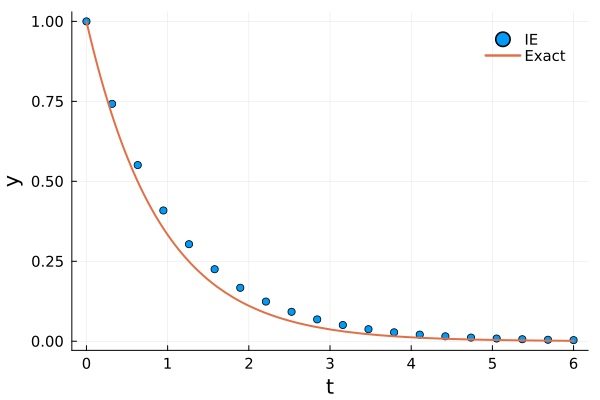

In [12]:
y0 = 1
a  = 1.1

tend = 6.0

t    = LinRange(0.0, tend, 20)
ns   = length(t) - 1
y    = zeros(ns+1)
y[1] = y0

for k in 1:ns              # have n points, take n-1 steps
    Δt = t[k+1]-t[k]
    y[k+1] = y[k]/(1+a*Δt)
end

plt.resetfontsizes(); plt.scalefontsizes(1.3)
plt.scatter(t,y, label="IE")
plt.plot!(t->y0*exp(-a*t), lw=2, label="Exact")
plt.plot!(xlabel="t", ylabel="y")
plt.plot!(foreground_color_legend=nothing, background_color_legend=nothing)

### Example 3 (EE, IE nonlinear)
* Solve the following nonlinear ODE using EE and IE
$$\frac{dy}{dt} = -y^{0.8},$$
$$y_0 = 1.$$

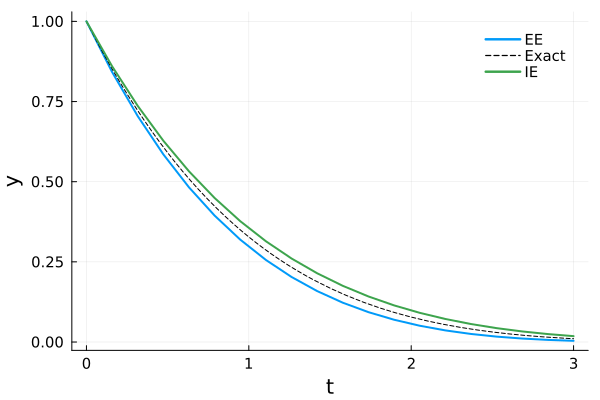

In [85]:
using NLsolve



function ode_IE(f, y0, t)
    
    ns = length(t) - 1
    y = zeros(ns+1)
    y[1] = y0
    
    function F!(Fval, ynext)
        Fval[1] =  ynext[1]-y[kk]-Δt*f(ynext[1],t[kk+1])
    end
    
    kk = undef                  # get index into the function scope for use in F!
    for k in 1:ns
        kk = k
        Δt = t[k+1]-t[k]
        tkp1 = t[k+1]
        results = nlsolve(F!, [y[k]])
        y[k+1] = results.zero[1]
    end

    return y
end

#------------------

myfunc(y,t) = -y^0.8

#------------------

y0   = 1.0
tend = 3.0

t = LinRange(0.0, tend, 20)
n = length(t)

yEE = ode_EE(myfunc,y0,t)
yIE = ode_IE(myfunc,y0,t)

#---------------------

plt.resetfontsizes(); plt.scalefontsizes(1.3)
plt.plot(t,yEE,lw=2, label="EE")
plt.plot!(t->(1-0.2*t)^(1/0.2), label="Exact", ls=:dash, color="black" )
plt.plot!(t,yIE,lw=2, label="IE")
plt.plot!(foreground_color_legend=nothing, background_color_legend=nothing)
plt.plot!(xlabel="t", ylabel="y")